## Analysing Foreign Tourism in Spain

In this project, we will use visualization tools to analize the spanish tourism from its origin in Spain for the period of 2001 - 2018.

The dataset for this project has been collated from the Tourist Movement on Borders (Frontur) Survey:
- From 2001 to September 2015: [FRONTUR](http://estadisticas.tourspain.es/en-EN/turismobase/Paginas/default.aspx).
- From October 2016 to 2018: [INE](http://www.ine.es/dyngs/INEbase/en/operacion.htm?c=Estadistica_C&cid=1254736176996&menu=ultiDatos&idp=1254735576863)

As stated in the website, The Tourist Movement on Borders (Frontur) Survey has as main objective to provide monthly and annual estimates on the number of visitors not resident in Spain that come to Spain (turists and same-day visitors), as well as the main features of the trips (way of access, destination, country of residence, reason, way of organization,...).

In [62]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

#Load the Tourist Movement dataset
url = "Turismo.csv"
df = pd.read_csv(url)

In [63]:
#Looking at the first few rows in the dataset
df.head()

,Origen,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Total,48565344,50330623,50853815,52429832,55913778,58004462,58665504,57192014,52177640,52676973,56176884,57464496,60675489,64938945,68153674.0,75315008.0,81868522.0,82773156.0
1,Alemania,10187614,9574615,9303289,9536621,9917619,10139582,10080606,10062629,8935147,8814070,8975236,9318737,9856687,10420411,10249204.0,11208656.0,11897376.0,11414481.0
2,Austria,397549,433599,415281,413118,481852,525484,489482,546060,506161,561190,579430,564068,568403,591458,NaN,NaN,NaN,NaN
3,Bélgica,1662930,1733815,1761867,1736388,1821667,1820777,1724409,1636636,1599004,1623375,1756695,1701782,1873388,2177818,2257702.0,2301628.0,2474720.0,2500278.0
4,Dinamarca,632968,597670,633559,693116,726899,806027,932132,956546,960009,937726,909515,929258,984844,1053936,NaN,NaN,NaN,NaN


In [64]:
As the data is using large numbers, we will convert them to millions, so this will make easier plotting.

SyntaxError: invalid syntax (<ipython-input-64-6d69405ed58a>, line 1)

In [65]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 19 columns):
Origen    27 non-null object
2001      27 non-null int64
2002      27 non-null int64
2003      27 non-null int64
2004      27 non-null int64
2005      27 non-null int64
2006      27 non-null int64
2007      27 non-null int64
2008      27 non-null int64
2009      27 non-null int64
2010      27 non-null int64
2011      27 non-null int64
2012      27 non-null int64
2013      27 non-null int64
2014      27 non-null int64
2015      15 non-null float64
2016      15 non-null float64
2017      15 non-null float64
2018      15 non-null float64
dtypes: float64(4), int64(14), object(1)
memory usage: 4.1+ KB


We can see that, due to the data coming from 2 difference sources, from 2015 the number of columns is only 15. For the purpose of this analysis, we will nead to deal with it.
Also, this is causing the data to have different datatypes, which we are going to adjust.

In [66]:
#We need to convert all the columns to float
df[["2001", "2002", "2003",
    "2004", "2005", "2006", "2007",
    "2008", "2009", "2010", "2011",
    "2012", "2013", "2014"]] = df[["2001", "2002", "2003",
    "2004", "2005", "2006", "2007",
    "2008", "2009", "2010", "2011",
    "2012", "2013", "2014"]].astype("float64")

In [67]:
#Easier to manage the data in millions
df[["2001", "2002", "2003",
    "2004", "2005", "2006", "2007",
    "2008", "2009", "2010", "2011",
    "2012", "2013", "2014", "2015", "2016", "2017", "2018"]] = df[["2001", "2002", "2003",
    "2004", "2005", "2006", "2007",
    "2008", "2009", "2010", "2011",
    "2012", "2013", "2014", "2015", "2016", "2017", "2018"]].divide(1000000)

In [68]:
df.describe()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,15.000000,15.000000,15.000000,15.000000
mean,3.597433,3.728194,3.766949,3.883691,4.141761,4.296627,4.345593,4.236445,3.865010,3.901998,4.161251,4.256629,4.494481,4.810292,8.758272,9.700066,10.527366,10.650850
std,9.529872,9.872242,10.021022,10.315750,10.978035,11.358003,11.473516,11.170037,10.143795,10.196323,10.868259,11.111813,11.731238,12.550716,17.008092,18.753439,20.329520,20.509158
min,0.064052,0.058607,0.056614,0.053352,0.057556,0.075406,0.059845,0.069600,0.024222,0.017706,0.037671,0.040618,0.057641,0.061237,0.959930,1.004577,1.150055,1.222426
25%,0.214976,0.238271,0.220677,0.224979,0.271247,0.299337,0.307457,0.288218,0.339728,0.420045,0.410315,0.395926,0.396649,0.457917,1.776924,1.998988,2.306300,2.423341
50%,0.745778,0.903510,0.887135,0.892101,0.883523,0.918686,1.046698,1.044591,0.969949,1.112935,1.137298,1.239199,1.487427,1.420467,2.916983,3.355031,3.704549,3.848545
75%,1.608142,1.699823,1.693159,1.830271,1.963837,2.148919,2.167667,2.229925,2.075282,2.085984,2.084899,2.009775,2.158043,2.416513,7.064948,8.117809,8.405140,8.661943
max,48.565344,50.330623,50.853815,52.429832,55.913778,58.004462,58.665504,57.192014,52.177640,52.676973,56.176884,57.464496,60.675489,64.938945,68.153674,75.315008,81.868522,82.773156


We can examine the types of the column label and change all to string if needed

In [69]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df.columns)
#df_can.columns = list(map(str, df.columns)) - this is the code needed to change it

True

In [70]:
df.columns.values

array(['Origen', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018'], dtype=object)

In [71]:
df.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64)

In [72]:
print(type(df.columns))
print(type(df.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [73]:
df.columns.tolist()
df.columns.tolist()
print(type(df.columns.tolist()))
print(type(df.index.tolist()))

<class 'list'>
<class 'list'>


In [74]:
df.shape

(27, 19)

In [75]:
df['Total']=df.sum(axis=1)

In [76]:
df.isnull().sum()

Origen     0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015      12
2016      12
2017      12
2018      12
Total      0
dtype: int64

In [77]:
df.describe()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,15.000000,15.000000,15.000000,15.000000,27.000000
mean,3.597433,3.728194,3.766949,3.883691,4.141761,4.296627,4.345593,4.236445,3.865010,3.901998,4.161251,4.256629,4.494481,4.810292,8.758272,9.700066,10.527366,10.650850,79.506664
std,9.529872,9.872242,10.021022,10.315750,10.978035,11.358003,11.473516,11.170037,10.143795,10.196323,10.868259,11.111813,11.731238,12.550716,17.008092,18.753439,20.329520,20.509158,210.791652
min,0.064052,0.058607,0.056614,0.053352,0.057556,0.075406,0.059845,0.069600,0.024222,0.017706,0.037671,0.040618,0.057641,0.061237,0.959930,1.004577,1.150055,1.222426,0.734127
25%,0.214976,0.238271,0.220677,0.224979,0.271247,0.299337,0.307457,0.288218,0.339728,0.420045,0.410315,0.395926,0.396649,0.457917,1.776924,1.998988,2.306300,2.423341,5.541582
50%,0.745778,0.903510,0.887135,0.892101,0.883523,0.918686,1.046698,1.044591,0.969949,1.112935,1.137298,1.239199,1.487427,1.420467,2.916983,3.355031,3.704549,3.848545,16.519833
75%,1.608142,1.699823,1.693159,1.830271,1.963837,2.148919,2.167667,2.229925,2.075282,2.085984,2.084899,2.009775,2.158043,2.416513,7.064948,8.117809,8.405140,8.661943,42.137817
max,48.565344,50.330623,50.853815,52.429832,55.913778,58.004462,58.665504,57.192014,52.177640,52.676973,56.176884,57.464496,60.675489,64.938945,68.153674,75.315008,81.868522,82.773156,1084.176159


Setting the below as index is usefull when using .loc method

In [78]:
df.set_index('Origen', inplace=True)

In [79]:
df.index.values

array(['Total', 'Alemania', 'Austria', 'Bélgica', 'Dinamarca',
       'Finlandia', 'Francia', 'Irlanda ', 'Italia', 'Noruega',
       'Países Bajos', 'Portugal', 'Reino Unido', 'Suecia', 'Suiza',
       'Rusia', 'Resto Europa ', 'EE.UU.', 'Argentina', 'Brasil',
       'Canada', 'Chile', 'Mexico', 'Venezuela', 'Otros América', 'Japón',
       'Resto Mundo '], dtype=object)

In [80]:
df.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
Origen,,,,,,,,,,,,,,,,,,,
Total,48.565344,50.330623,50.853815,52.429832,55.913778,58.004462,58.665504,57.192014,52.177640,52.676973,56.176884,57.464496,60.675489,64.938945,68.153674,75.315008,81.868522,82.773156,1084.176159
Alemania,10.187614,9.574615,9.303289,9.536621,9.917619,10.139582,10.080606,10.062629,8.935147,8.814070,8.975236,9.318737,9.856687,10.420411,10.249204,11.208656,11.897376,11.414481,179.892580
Austria,0.397549,0.433599,0.415281,0.413118,0.481852,0.525484,0.489482,0.546060,0.506161,0.561190,0.579430,0.564068,0.568403,0.591458,NaN,NaN,NaN,NaN,7.073135
Bélgica,1.662930,1.733815,1.761867,1.736388,1.821667,1.820777,1.724409,1.636636,1.599004,1.623375,1.756695,1.701782,1.873388,2.177818,2.257702,2.301628,2.474720,2.500278,34.164879
Dinamarca,0.632968,0.597670,0.633559,0.693116,0.726899,0.806027,0.932132,0.956546,0.960009,0.937726,0.909515,0.929258,0.984844,1.053936,NaN,NaN,NaN,NaN,11.754205


In [81]:
df.index.name = None

In [82]:
print(df.loc['Alemania'])

2001      10.187614
2002       9.574615
2003       9.303289
2004       9.536621
2005       9.917619
2006      10.139582
2007      10.080606
2008      10.062629
2009       8.935147
2010       8.814070
2011       8.975236
2012       9.318737
2013       9.856687
2014      10.420411
2015      10.249204
2016      11.208656
2017      11.897376
2018      11.414481
Total    179.892580
Name: Alemania, dtype: float64


In [83]:
years = list(map(str, range(2001, 2019)))
years

['2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018']

In [92]:
#defining variables for countries to be plotted
UK = df.loc["Reino Unido",years]
Germany = df.loc["Alemania",years]
France = df.loc["Francia",years]
Italy = df.loc["Italia",years]
Netherlands = df.loc["Países Bajos",years]
Total = df.loc["Total", years]

#checking head of one of the variables
UK.head()

2001    13.309319
2002    13.846376
2003    15.224026
2004    15.629226
2005    16.090030
Name: Reino Unido, dtype: float64

In [93]:
#defining a function for easier plotting of countries
def plot_country(country, title):
    country.index = country.index.map(int) # Change the index values to type integer for plotting
    
    fig, ax = plt.subplots()
    
    ax.set_title(title) #title to be changed
    ax.set_ylabel("Number of tourist (in millions)")
    ax.set_xlabel("Years")
    country.plot(kind='line')
    plt.show()

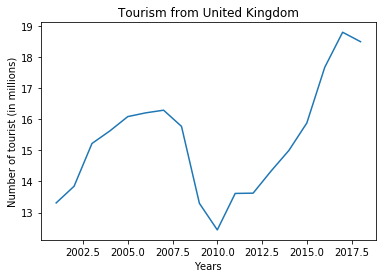

In [94]:
title = "Tourism from United Kingdom"
plot_country(UK, title)

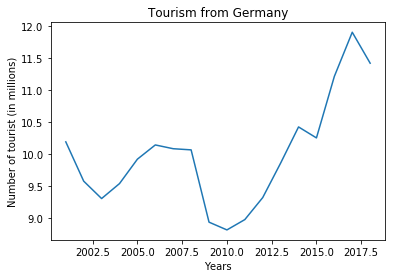

In [95]:
title = "Tourism from Germany"
plot_country(Germany, title)

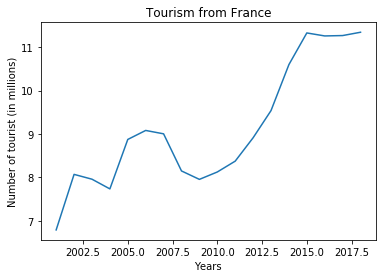

In [96]:
title = "Tourism from France"
plot_country(France, title)

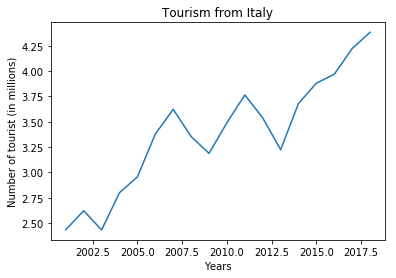

In [97]:
title = "Tourism from Italy"
plot_country(Italy, title)

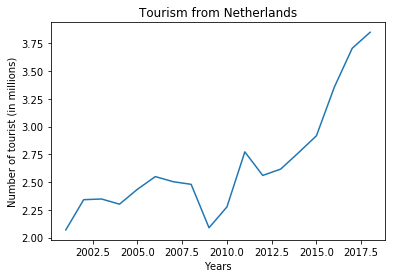

In [98]:
title = "Tourism from Netherlands"
plot_country(Netherlands, title)

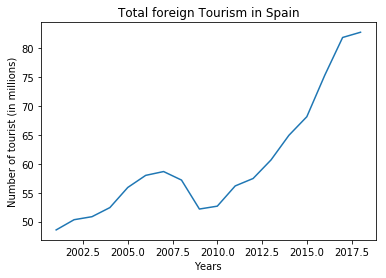

In [99]:
title = "Total foreign Tourism in Spain"
plot_country(Total, title)

In [28]:
df_test= df.drop(['Total', 'Resto Europa '], axis=0)
#df_test['Total'] = df_test.sum(axis=1)

In [29]:
df_test.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
Alemania,10.187614,9.574615,9.303289,9.536621,9.917619,10.139582,10.080606,10.062629,8.935147,8.814070,8.975236,9.318737,9.856687,10.420411,10.249204,11.208656,11.897376,11.414481,179.892580
Austria,0.397549,0.433599,0.415281,0.413118,0.481852,0.525484,0.489482,0.546060,0.506161,0.561190,0.579430,0.564068,0.568403,0.591458,NaN,NaN,NaN,NaN,7.073135
Bélgica,1.662930,1.733815,1.761867,1.736388,1.821667,1.820777,1.724409,1.636636,1.599004,1.623375,1.756695,1.701782,1.873388,2.177818,2.257702,2.301628,2.474720,2.500278,34.164879
Dinamarca,0.632968,0.597670,0.633559,0.693116,0.726899,0.806027,0.932132,0.956546,0.960009,0.937726,0.909515,0.929258,0.984844,1.053936,NaN,NaN,NaN,NaN,11.754205
Finlandia,0.412637,0.403940,0.381436,0.417617,0.435747,0.473820,0.512922,0.509103,0.517203,0.507161,0.574039,0.581777,0.657057,0.682876,NaN,NaN,NaN,NaN,7.067335


In [30]:
df_test.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_top5 = df_test.head()
df_top5 = df_top5[years].transpose()
df_top5.head()

,Reino Unido,Alemania,Francia,Italia,Países Bajos
2001,13.309319,10.187614,6.791089,2.436022,2.069590
2002,13.846376,9.574615,8.070233,2.623167,2.341723
2003,15.224026,9.303289,7.959196,2.433979,2.347875
2004,15.629226,9.536621,7.735762,2.800709,2.301252
2005,16.090030,9.917619,8.874747,2.956891,2.434990


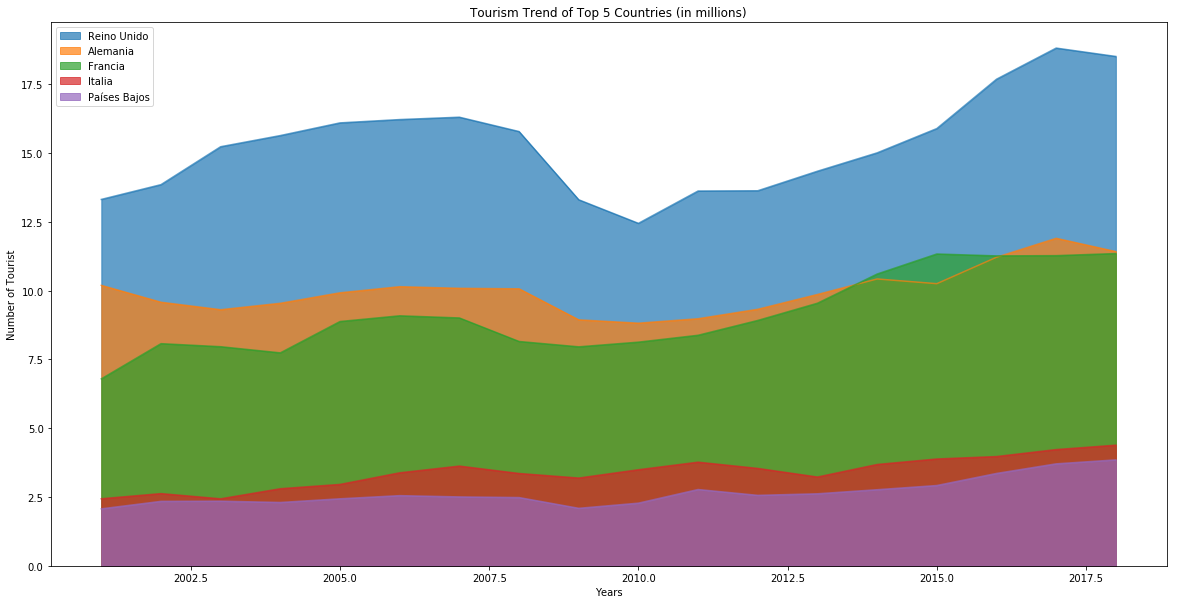

In [31]:
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
ax = df_top5.plot(kind='area', 
             alpha = 0.7,
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

ax.set_title('Tourism Trend of Top 5 Countries (in millions)')
ax.set_ylabel('Number of Tourist')
ax.set_xlabel('Years')

plt.show()

In [32]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[23  2  1  0  0  0  0  0  0  1]
[5.76410000e-02 6.11942580e+00 1.21812106e+01 1.82429954e+01
 2.43047802e+01 3.03665650e+01 3.64283498e+01 4.24901346e+01
 4.85519194e+01 5.46137042e+01 6.06754890e+01]


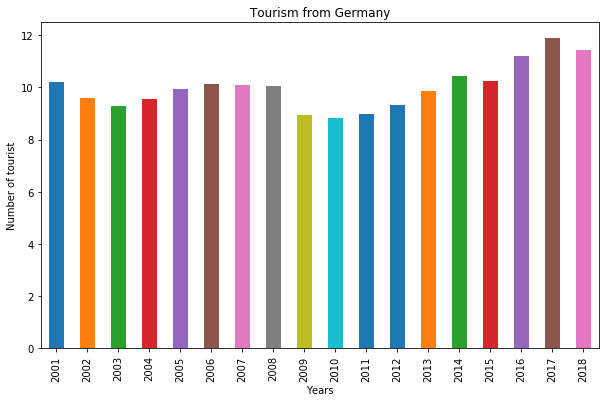

In [33]:
fig, ax = plt.subplots()

ax.set_title('Tourism from Germany')
ax.set_ylabel('Number of tourist')
ax.set_xlabel('Years')
Alemania.plot(kind='bar', figsize = (10,6))

In [34]:
df_FA=df.loc[["Alemania", "Francia"],years].transpose()
df_FA.head()

,Alemania,Francia
2001,10.187614,6.791089
2002,9.574615,8.070233
2003,9.303289,7.959196
2004,9.536621,7.735762
2005,9.917619,8.874747


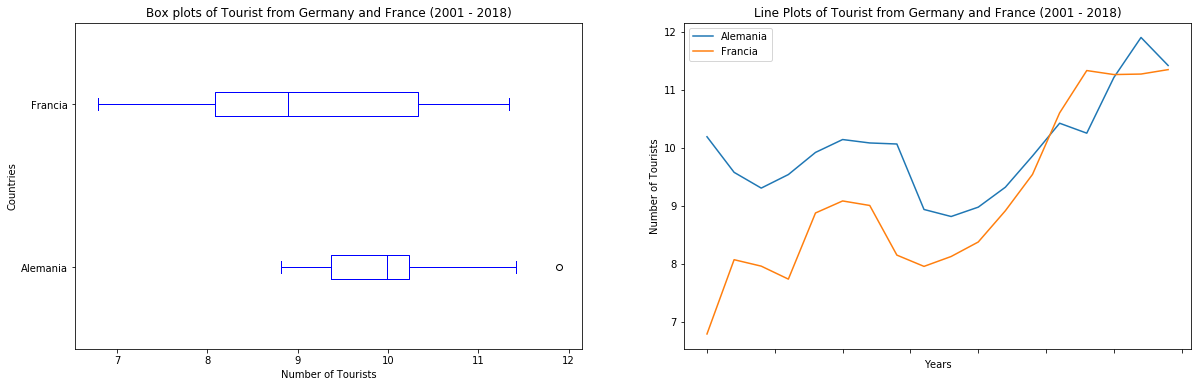

In [35]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_FA.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box plots of Tourist from Germany and France (2001 - 2018)')
ax0.set_xlabel('Number of Tourists')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_FA.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Tourist from Germany and France (2001 - 2018)')
ax1.set_ylabel('Number of Tourists')
ax1.set_xlabel('Years')

plt.show()

In [36]:
df_tot=df.loc[["Total"],years].transpose()
df_tot.head()

,Total
2001,48.565344
2002,50.330623
2003,50.853815
2004,52.429832
2005,55.913778


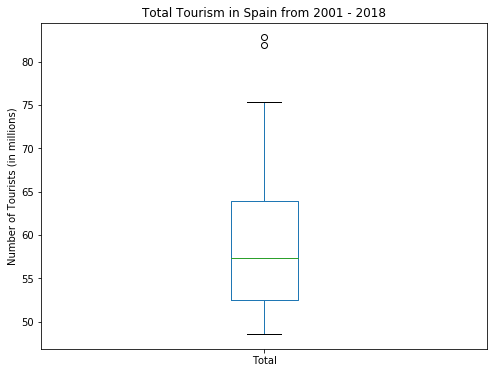

In [37]:
Total.index = Total.index.map(int)

df_tot.plot(kind='box', figsize=(8, 6))#, x="Total", y='years', figsize=(10, 6), color='darkblue')

plt.title('Total Tourism in Spain from 2001 - 2018')
plt.ylabel('Number of Tourists (in millions)')

plt.show()

In [38]:
df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace = True)
df_tot.rename(columns = {"index":"year"}, inplace = True)
df_tot.head()

,year,Total
0,2001,48.565344
1,2002,50.330623
2,2003,50.853815
3,2004,52.429832
4,2005,55.913778


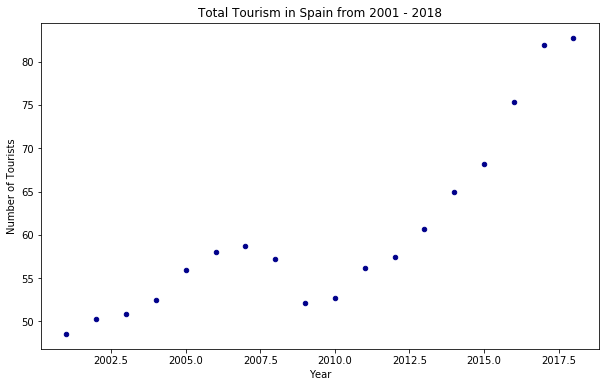

In [39]:
df_tot.plot(kind='scatter', x='year', y='Total', figsize=(10, 6), color='darkblue')

plt.title('Total Tourism in Spain from 2001 - 2018')
plt.xlabel('Year')
plt.ylabel('Number of Tourists')

plt.show()

In [40]:
x = df_tot['year']      # year on x-axis
y = df_tot['Total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 1.68929995e+00, -3.33441625e+03])

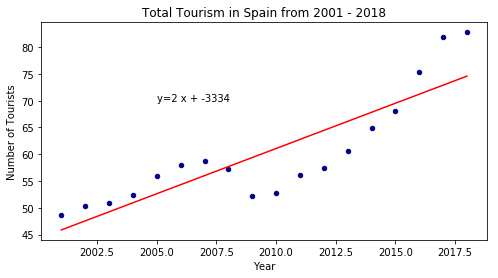

In [41]:
df_tot.plot(kind='scatter', x='year', y='Total', figsize=(8, 4), color='darkblue')

plt.title('Total Tourism in Spain from 2001 - 2018')
plt.xlabel('Year')
plt.ylabel('Number of Tourists')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2005, 70))

plt.show()